# Creating and manipulating Qbits

In [2]:
import qse
import numpy as np

## 1. Create Qbits.

A `Qbits` object can represent : 

- An arbitrary qubit layout.
- A repeated structure. 

`Qbits` objects can be created in different ways. Let's see how it is done by performing providing some examples. 



### 1.1. Specify the qubits positions.

The first way of creating a Qbits object is by specifying the `positions` of their qubits in the *cartesian coordinate system*. With the `labels` parameter we are assigning a label to each qubit. 


In [3]:
coords_1 = np.array([[0.76, 0, 0.58]])
coords_2 = np.array([[-0.76, 0, 0.58]])
coords_3 = np.array([[0, 0, 0]])
positions = np.concatenate((coords_1, coords_2, coords_3), axis=0)
qbits_1 = qse.Qbits(positions=positions, labels=["qbit1", "qbit2", "qbit3"])

### 1.2. Specify the cell positions. 
We can also create a qbits object by inputting the unit cell coordinates into the `cell` argument. Let's see an example for a cubic cell type. The `scaled_positions` argument is the position of the qubits, given in units of the unit cell. 


In [5]:
cell = np.array(
    [[4.994, 0, 0], [0, 4.994, 0], [0, 0, 4.994]]
)  # cell is defined using coordinates.
scaled_positions = np.array([[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]])
qbits_2 = qse.Qbits(cell=cell, scaled_positions=scaled_positions)

### 1.3. Specify the structure vectors and angles. 

We can use the lattice vectors $a_1$, $a_2$, $a_3$ and the angles  $\alpha\angle a_2a_3$ ,  $\beta\angle a_1a_3$ , $\gamma\angle a_1a_2$, to define our cell instead of using its coordinates as we did before. Let's see an example where: 

$\alpha = \gamma = 90°, \beta = 112.48$, $a_1 = 5.87A$, $a_2 = 8.12A$, $a_3 = 7.45A$






In [6]:
a1 = 4.13
a2 = 4.13
a3 = 6.91
alpha = 90.00
beta = 90.00
gamma = 120.00
cell = [
    a1,
    a2,
    a3,
    alpha,
    beta,
    gamma,
]  # cell is defined using lattice vectors and angles
scaled_positions_1 = [0, 0, 0]
scaled_positions_2 = [0.33, 0.66, 0.25]
scaled_positions = np.array([scaled_positions_1, scaled_positions_2])
qbits_3 = qse.Qbits(cell=cell, scaled_positions=scaled_positions)

### 1.4. Add single `Qbit` objects.

Single `Qbit` objects can be added to form a `Qbits` object. Let's build again the Qbits object we saw in section 1.1 this way.

In [ ]:
qbit_1 = qse.Qbit(position=coords_1.flatten().tolist())
qbit_2 = qse.Qbit(position=coords_2.flatten().tolist())
qbit_3 = qse.Qbit(position=coords_3.flatten().tolist())

qbits_4 = qse.Qbits()
qbits_4.extend(qbit_1)
qbits_4.extend(qbit_2)
qbits_4.extend(qbit_3)

## 2. Qbits methods.

### 2.1. Draw qbits. 

After the cells are created, we can use the `repeat` method to generate repeated structure. The argument of `repeat` can be a sequence of three integers indicating the number of repetitions on each direction or a simple integer indicating equal repetition on each direction. Once the repeated structure is created, we can use the `draw` method to visualise it. 

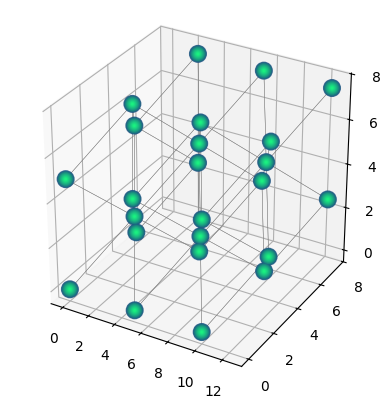

In [11]:
qbits_2 = qbits_2.repeat((3, 2, 2))
qbits_2.draw(radius="nearest")

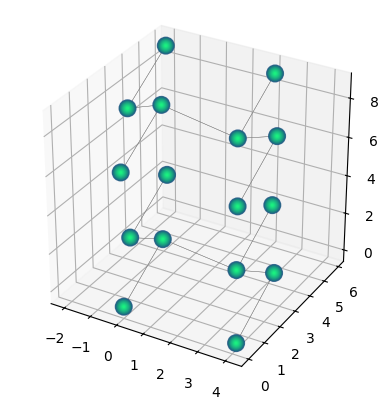

In [12]:
qbits_3 = qbits_3.repeat(2)
qbits_3.draw(radius="nearest")

Our drawing function is also able to draw 2d structures. We can see an example of this in the cell below, that creates and draws a 2d Qbits object. 

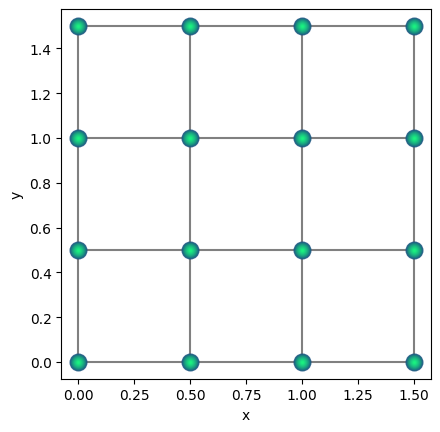

In [80]:
cell = np.array([
    [1.0, 0.0, 0.0],   
    [0.0, 1.0, 0.0],   
    [0.0, 0.0, 0.0],   
])

positions = np.array([
    [0.0, 0.0, 0.0],
    [0.5, 0.0, 0.0],
    [0.0, 0.5, 0.0],
    [0.5, 0.5, 0.0],
])
qbits_5 = qse.Qbits(cell=cell, positions=positions)
qbits_5 = qbits_5.repeat((2,2,1))
qbits_5.draw(radius='nearest')

### 2.2. Translate repeated structure.

We can translate our repeated structures using the `translate` method, to which we can input an xyz vector that dictates how much the structure is translated in each direction. 

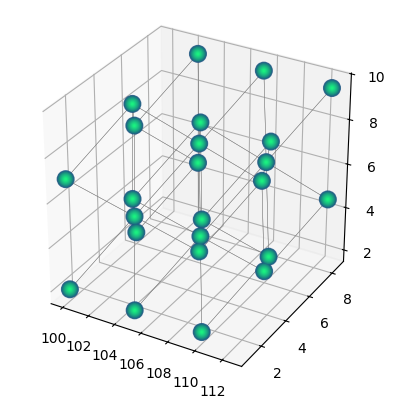

In [13]:
qbits_2.translate((100, 1, 2))
qbits_2.draw(radius="nearest")

Translations of the structure can also be made using the `set_centroid` method, as we can see below.

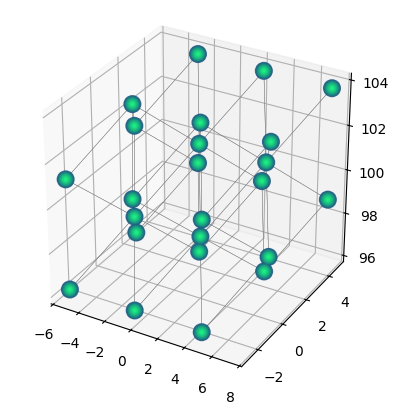

In [14]:
qbits_2.set_centroid((1, 1, 100))
qbits_2.draw(radius="nearest")

### 2.3. Rotate structures.

One can use the method `rotate` to perform lattice rotations, specifying the angle and the axis along which the rotation will be performed. 

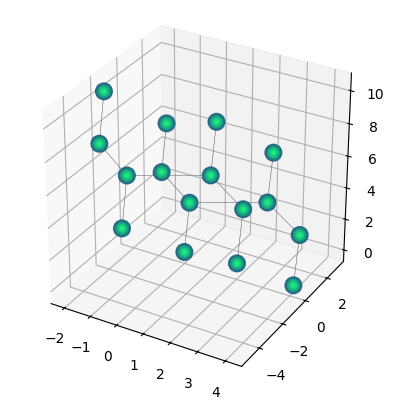

In [15]:
qbits_3.rotate(45, v="x", rotate_cell=True)
qbits_3.draw(radius="nearest")

With the method `euler_rotate` we can rotate a lattice by inputting the angles $\phi$, $\theta$, $\psi$ in degrees, as shown below. 

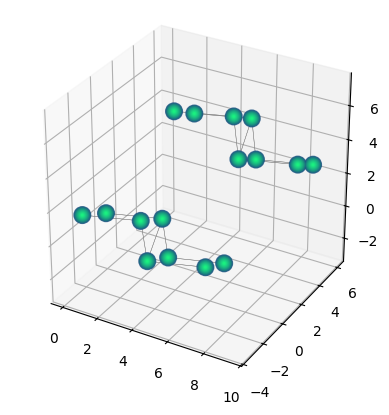

In [16]:
qbits_3.euler_rotate(30, 80, 70)
qbits_3.draw(radius="nearest")